# Simulación de la Superficie Plasmónica

## Curvas de Reflectancia en función del Ángulo de Incidencia

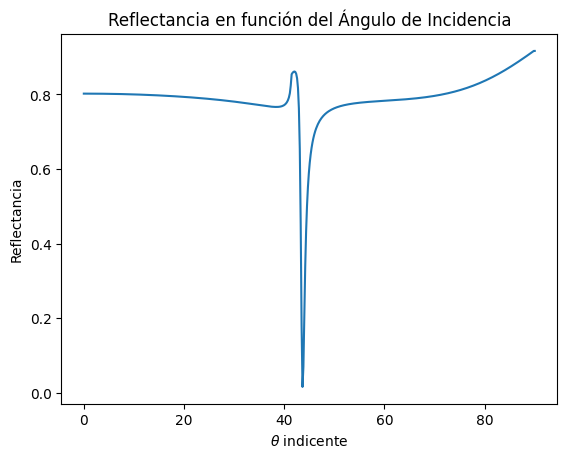

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.loadtxt('Data.dat',skiprows=1, dtype = str)
data1 = np.char.replace(data1, ',','.')
data1[-1,1] = data1[-2,1]
data1 = data1.astype('float64')
plt.plot(data1[:,0],data1[:,1])
plt.title('Reflectancia en función del Ángulo de Incidencia')
plt.xlabel(r'$\theta$ indicente')
plt.ylabel(r'Reflectancia')
plt.savefig('R1.pdf')

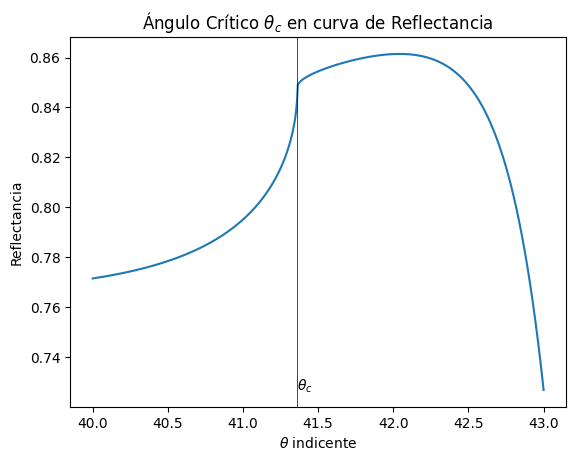

In [7]:
data1A = np.loadtxt('DataETR.dat',skiprows=1, dtype = str)
data1A = np.char.replace(data1A, ',','.')
data1A = data1A.astype('float64')

def CritAngle(data):
    deriv = np.zeros(len(data)-1)
    nextderiv = np.zeros(len(data)-1)
    diff = np.zeros(len(data)-1)
    for i in range(len(data)-2):
        deriv[i] = (data[i+1,1]-data[i,1])/(data[i+1,0]-data[i,0])
        nextderiv[i] = (data[i+2,1]-data[i+1,1])/(data[i+2,0]-data[i+1,0])
        diff[i] = np.abs(nextderiv[i] - deriv[i])
    return data[np.where(diff[:]==np.max(diff)),0]
    
plt.plot(data1A[:,0],data1A[:,1])
plt.axvline(CritAngle(data1A), color = 'black', linewidth=0.5)
plt.text(CritAngle(data1A), np.min(data1A), r'$\theta_c$')
plt.title(r'Ángulo Crítico $\theta_c$ en curva de Reflectancia')
plt.xlabel(r'$\theta$ indicente')
plt.ylabel(r'Reflectancia')
plt.savefig('R1A.pdf')

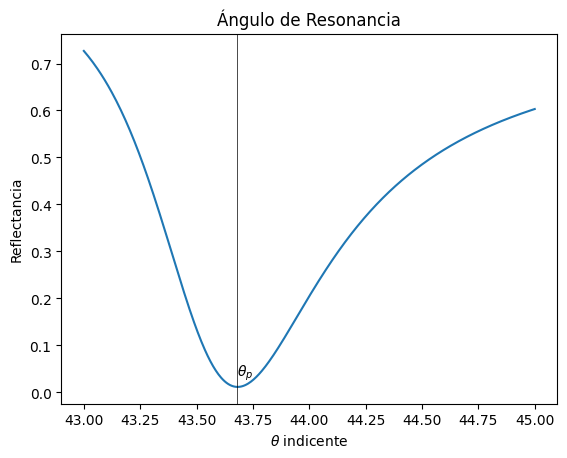

In [8]:
data1C = np.loadtxt('DataRA.dat',skiprows=1, dtype = str)
data1C = np.char.replace(data1C, ',','.')
data1C = data1C.astype('float64')

def ResonAngle(data):
    return data[np.where(data[:,1]==np.min(data[:,1])),0]

plt.plot(data1C[:,0],data1C[:,1])
plt.axvline(ResonAngle(data1C), color = 'black', linewidth=0.5)
plt.text(ResonAngle(data1C), 3*np.min(data1C), r'$\theta_p$')
plt.title('Ángulo de Resonancia')
plt.xlabel(r'$\theta$ indicente')
plt.ylabel(r'Reflectancia')
plt.savefig('R1B.pdf')

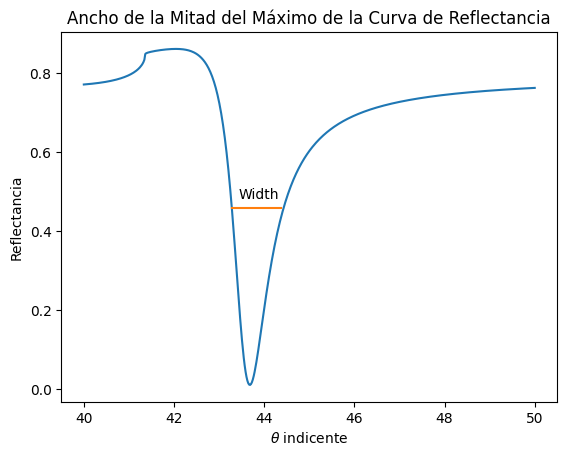

In [69]:
data1B = np.loadtxt('DataFWM.dat',skiprows=1, dtype = str)
data1B = np.char.replace(data1B, ',','.')
data1B = data1B.astype('float64')

#Tolerancia
e = 1e-2

#Arreglo de Datos
Val = np.zeros(2)

#Mitad del Máximo
Halfmax1 = np.max(data1[:,1])/2

def Width(data, Halfmax):
    
    #Valores de Referencia
    Vdiff = np.abs(data[:,1]-Halfmax)
    Vclose = np.zeros(2)
    A = ResonAngle(data)
    Vmax1 = 0
    Vmax2 = 0
    
    #First Value
    for i in range(len(data)):
        if data[i,0]==A:
            Vmax1 = i
            Vmax2 = len(data)-i
    Vdiff1 = np.zeros(Vmax1)
    Vdiff2 = np.zeros(Vmax2)
    
    for i in range(len(data)):
        if i < Vmax1:
            Vdiff1[i] = Vdiff[i]
        else:
            Vdiff2[i-Vmax1] = Vdiff[i]

    Vclose[0] = data[np.where(Vdiff[:]==np.min(Vdiff1)),0]
    Vclose[1] = data[np.where(Vdiff[:]==np.min(Vdiff2)),0]
    return Vclose
                
Val = Width(data1,Halfmax1)
Valprom = (Val[0]+Val[1])/2
W = Val[1]-Val[0]



X = [Val[0], Val[1]]
Y = [Halfmax1, Halfmax1]


plt.plot(data1B[:,0],data1B[:,1])
plt.plot(X,Y)
plt.text(Valprom*0.991, Halfmax1*1.05, r'Width')
plt.title('Ancho de la Mitad del Máximo de la Curva de Reflectancia')
plt.xlabel(r'$\theta$ indicente')
plt.ylabel(r'Reflectancia')
plt.savefig('R1C.pdf')

### Comparación de Curvas

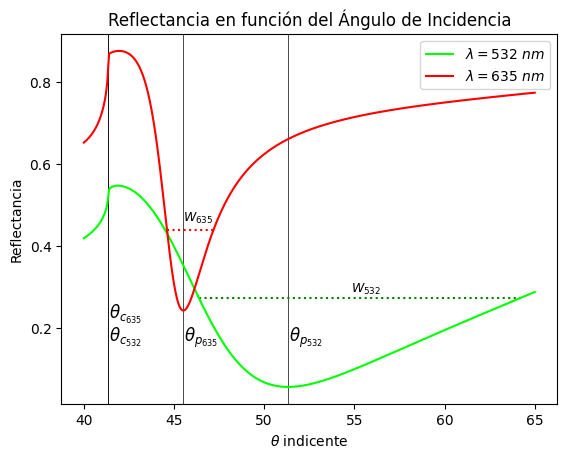

In [95]:
import numpy as np
import matplotlib.pyplot as plt

#Import Data
Data532 =  np.loadtxt('532P.dat',skiprows=1, dtype = str)
Data532 = np.char.replace(Data532, ',','.')
Data532 = Data532.astype('float64')

Data635 =  np.loadtxt('635P.dat',skiprows=1, dtype = str)
Data635[-1,1] = Data635[-2,1]
Data635 = np.char.replace(Data635, ',','.')
Data635 = Data635.astype('float64')

#ResonanceAngle
#532
A1 = ResonAngle(Data532)
plt.axvline(A1, color = 'black', linewidth=0.5)
plt.text(A1*1.001, 3*np.min(Data532), r'$\theta_{p_{532}}$', fontsize=12)
#635
A2 = ResonAngle(Data635)
plt.axvline(A2, color = 'black', linewidth=0.5)
plt.text(A2*1.001, 3*np.min(Data532), r'$\theta_{p_{635}}$', fontsize=12)

#CriticAngle
#532
AC1 = CritAngle(Data532)
plt.axvline(AC1, color = 'black', linewidth=0.5)
plt.text(AC1*1.001, 3*np.min(Data532), r'$\theta_{c_{532}}$', fontsize=12)
#635
AC2 = CritAngle(Data635)
plt.axvline(AC2, color = 'black', linewidth=0.5)
plt.text(AC2*1.001, 4*np.min(Data532), r'$\theta_{c_{635}}$', fontsize=12)

#Full Width at Maximun
e = 1e-2

#532 nm
Val1 = np.zeros(2)
HalfmaxA = np.max(Data532[:,1])/2
Val1 = Width(Data532,HalfmaxA)
Val1prom = (Val1[0]+Val1[1])/2


X1 = [Val1[0], Val1[1]]
Y1 = [HalfmaxA, HalfmaxA]

plt.plot(X1,Y1,':', color = 'green')
plt.text(Val1prom*0.991, HalfmaxA*1.05, r'$W_{532}$', fontsize=9)

#635 nm
Val2 = np.zeros(2)
HalfmaxB = np.max(Data635[:,1])/2
Val2 = Width(Data635,HalfmaxB)
Val2prom = (Val2[0]+Val2[1])/2

X2 = [Val2[0], Val2[1]]
Y2 = [HalfmaxB, HalfmaxB]

plt.plot(X2,Y2, ':', color = 'red')
plt.text(Val2prom*0.991, HalfmaxB*1.05, r'$W_{635}$', fontsize=9)

#Reflectance vs Theta
plt.plot(Data532[:,0],Data532[:,1], color = '#00FF01', label=r'$\lambda = 532 \ nm$')
plt.plot(Data635[:,0],Data635[:,1], color = 'red', label=r'$\lambda = 635 \ nm$')


plt.title('Reflectancia en función del Ángulo de Incidencia')
plt.xlabel(r'$\theta$ indicente')
plt.ylabel(r'Reflectancia')
plt.legend()
plt.savefig('R2.pdf')

### Para el rayo de $\lambda = 532 \ nm$ con Polarización $P$

### Para el rayo de $\lambda = 635 \ nm$ con Polarización $P$

## Parámetros de la Interfaz

## Distribución de Intensidad en la Interfaz

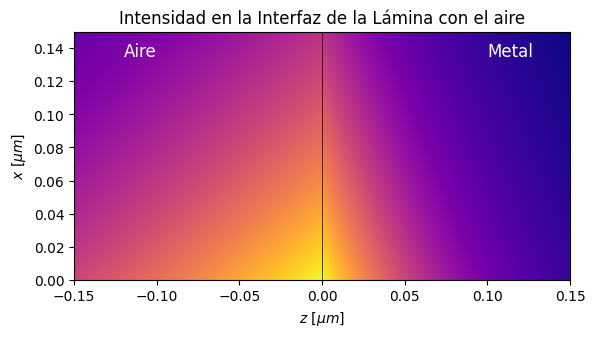

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.style.use('default')

def Isp(Io, x, L, z, Z):

        return Io*np.exp(-x/L)*np.exp(-z/(2*Z))

x = np.linspace(0, 0.15, 200)
z = np.linspace(-0.15, 0.15, 200)

#Para una longitud de onda de 532 nanometros
Io = 1. #Normalizada
L = 0.2 #micrometros
z1 = 0.04 #micrometros
z2 = 0.12 #micrometros

I = np.zeros([len(x),len(z)])

for j in range(0,len(x)):
    for i in range(0, int(len(z))):
        if z[i] < 0:
            I[j,i] = Isp(Io, x[j], L, np.abs(z[i]-0), z2)
        else:
            I[j,i] = Isp(Io, x[j], L, np.abs(z[i]-0), z1)
#Patrón
c = plt.imshow(I, cmap ='plasma', extent=[-np.max(z),np.max(z),np.min(x), np.max(x)], origin='lower')
#plt.colorbar()
#Interfaz
plt.axvline(x=0.0, c='black', linewidth = 0.5)
plt.title(r'Intensidad en la Interfaz de la Lámina con el aire')
plt.text(-0.12, 0.135, r'Aire', fontsize=12, color = 'white')
plt.text(0.10, 0.135, r'Metal', fontsize=12, color = 'white')
plt.xlabel(r'$z \ [\mu m]$')
plt.ylabel(r'$x \ [\mu m]$')
plt.savefig('I1.png')

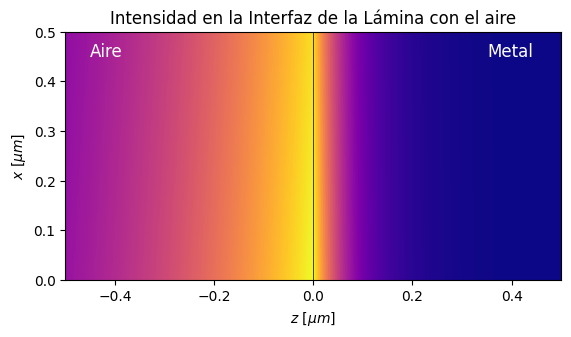

In [185]:
#Para una longitud de onda de 635 nanometros
Io = 1. #Normalizada
L = 7.3 #micrometros
z1 = 0.034 #micrometros
z2 = 0.22 #micrometros



x = np.linspace(0.0, 0.5, 200)
z = np.linspace(-0.5, 0.5, 200)
I2 = np.zeros([len(x),len(z)])

for j in range(0,len(x)):
    for i in range(0, int(len(z))):
        if z[i] < 0:
            I2[j,i] = Isp(Io, x[j], L, np.abs(z[i]-0), z2)
        else:
            I2[j,i] = Isp(Io, x[j], L, np.abs(z[i]-0), z1)
#Patrón
c = plt.imshow(I2, cmap ='plasma', extent=[-np.max(z),np.max(z),np.min(x), np.max(x)], origin='lower')
#plt.colorbar()
#Interfaz
plt.axvline(x=0.0, c='black', linewidth = 0.5)
plt.title(r'Intensidad en la Interfaz de la Lámina con el aire')
plt.xlabel(r'$z \ [\mu m]$')
plt.ylabel(r'$x \ [\mu m]$')
plt.text(-0.45, 0.45, r'Aire', fontsize=12, color = 'white')
plt.text(0.35, 0.45, r'Metal', fontsize=12, color = 'white')
plt.savefig('I2.png')